# Visualisation univariée du dataset :

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1) Ouverture du dataset

In [58]:
df = pd.read_csv("../../data/data_preprocessed.csv")
df.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Potability_det
0,0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0,0
1,1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0,1
2,2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1,0
3,3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1,1
4,4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0,0


### 2) Visualisation univariée de chaque variable
Toutes nos variables sont quantitatives, on les visualisera sous la forme d'un diagramme en boite et d'un de répartition

#### 2.1) Fonction de visualisation :

In [59]:
def display_variable(var:str):
    fig, axes = plt.subplots(4, 1, figsize=(12, 15))

    # Boxplot
    sns.boxplot(data=df, x=var, ax=axes[0])
    axes[0].set_title('Boxplot of ' + var)

    # Histogram
    b_inf = min(df[var])  # Borne inférieure
    b_sup = max(df[var])  # Borne supérieure
    sns.histplot(data=df, x=var, bins=np.arange(b_inf, b_sup, (b_sup - b_inf)/15 ), kde=True, ax=axes[1])
    axes[1].set_title('Histogram of ' + var)

    # Scatter plot
    sns.scatterplot(data=df, x=var, y="Potability", hue="Potability", ax=axes[2])
    axes[2].set_title("Scatterplot of reel prediction classes")
    sns.scatterplot(data=df, x=var, y="Potability_det", hue="Potability_det", ax=axes[3])
    axes[3].set_title("Scatterplot of preprocessed prediction classes")

    plt.tight_layout()
    plt.show()

#### 2.2) Affichage des données :

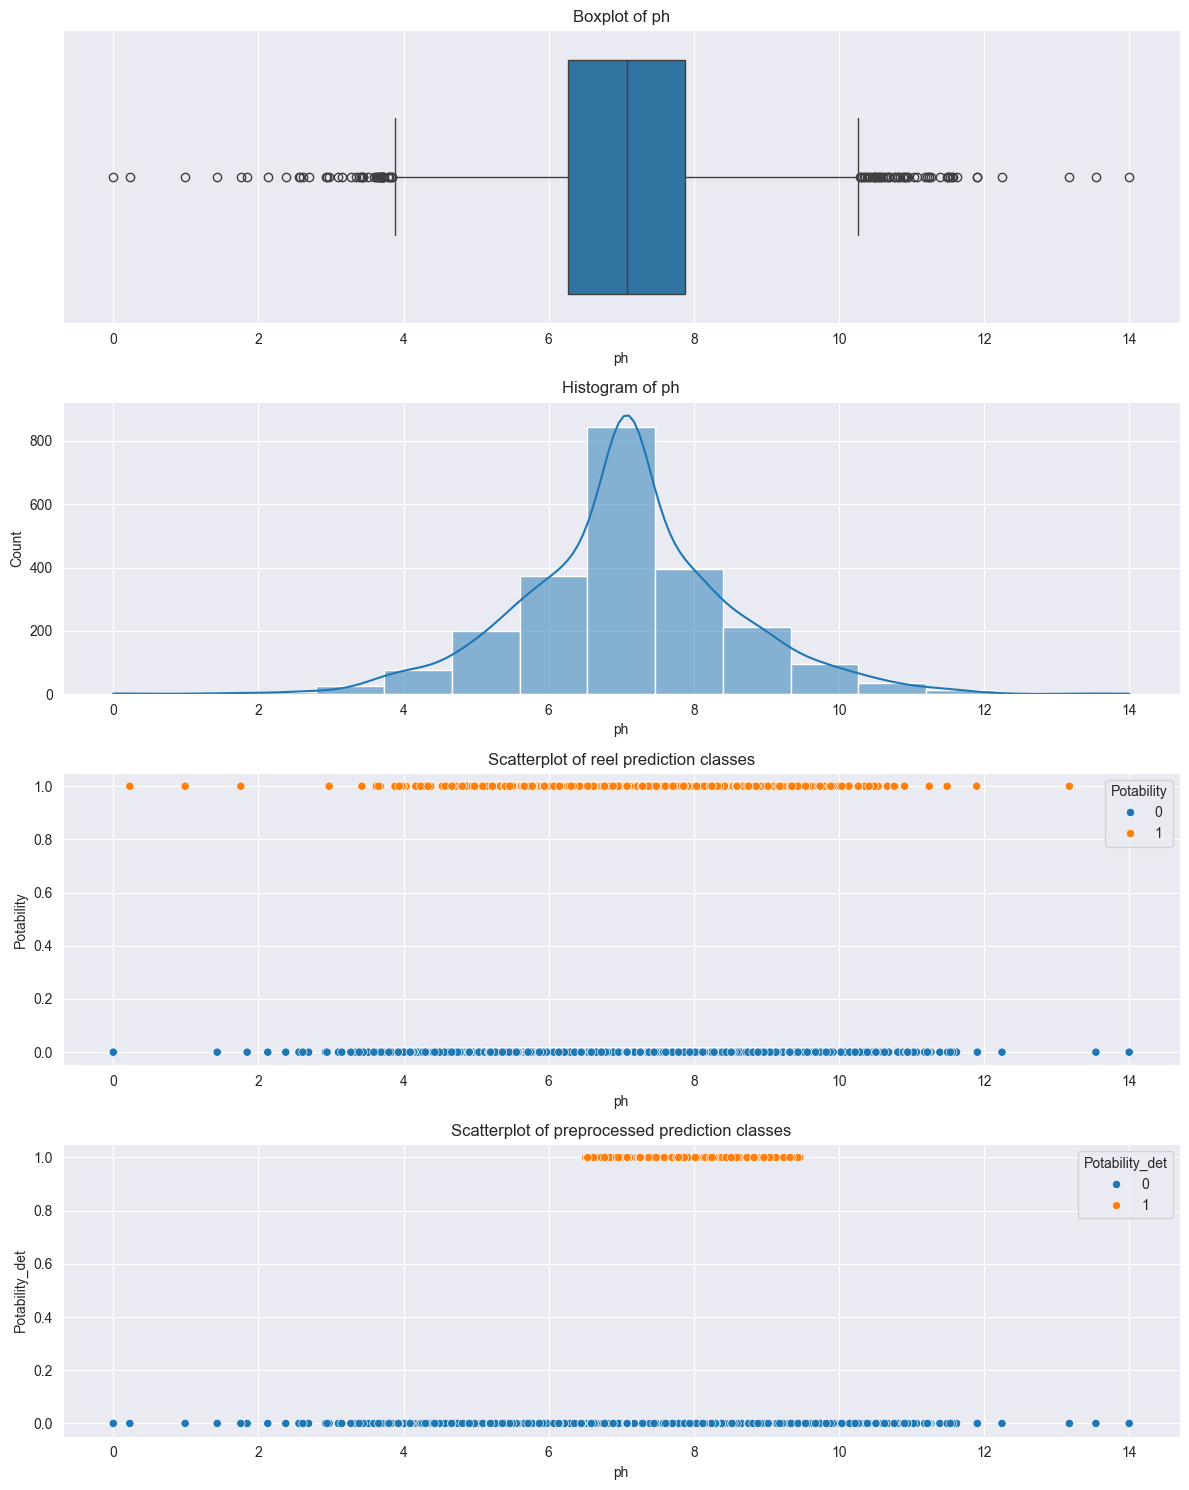

In [60]:
display_variable("ph")

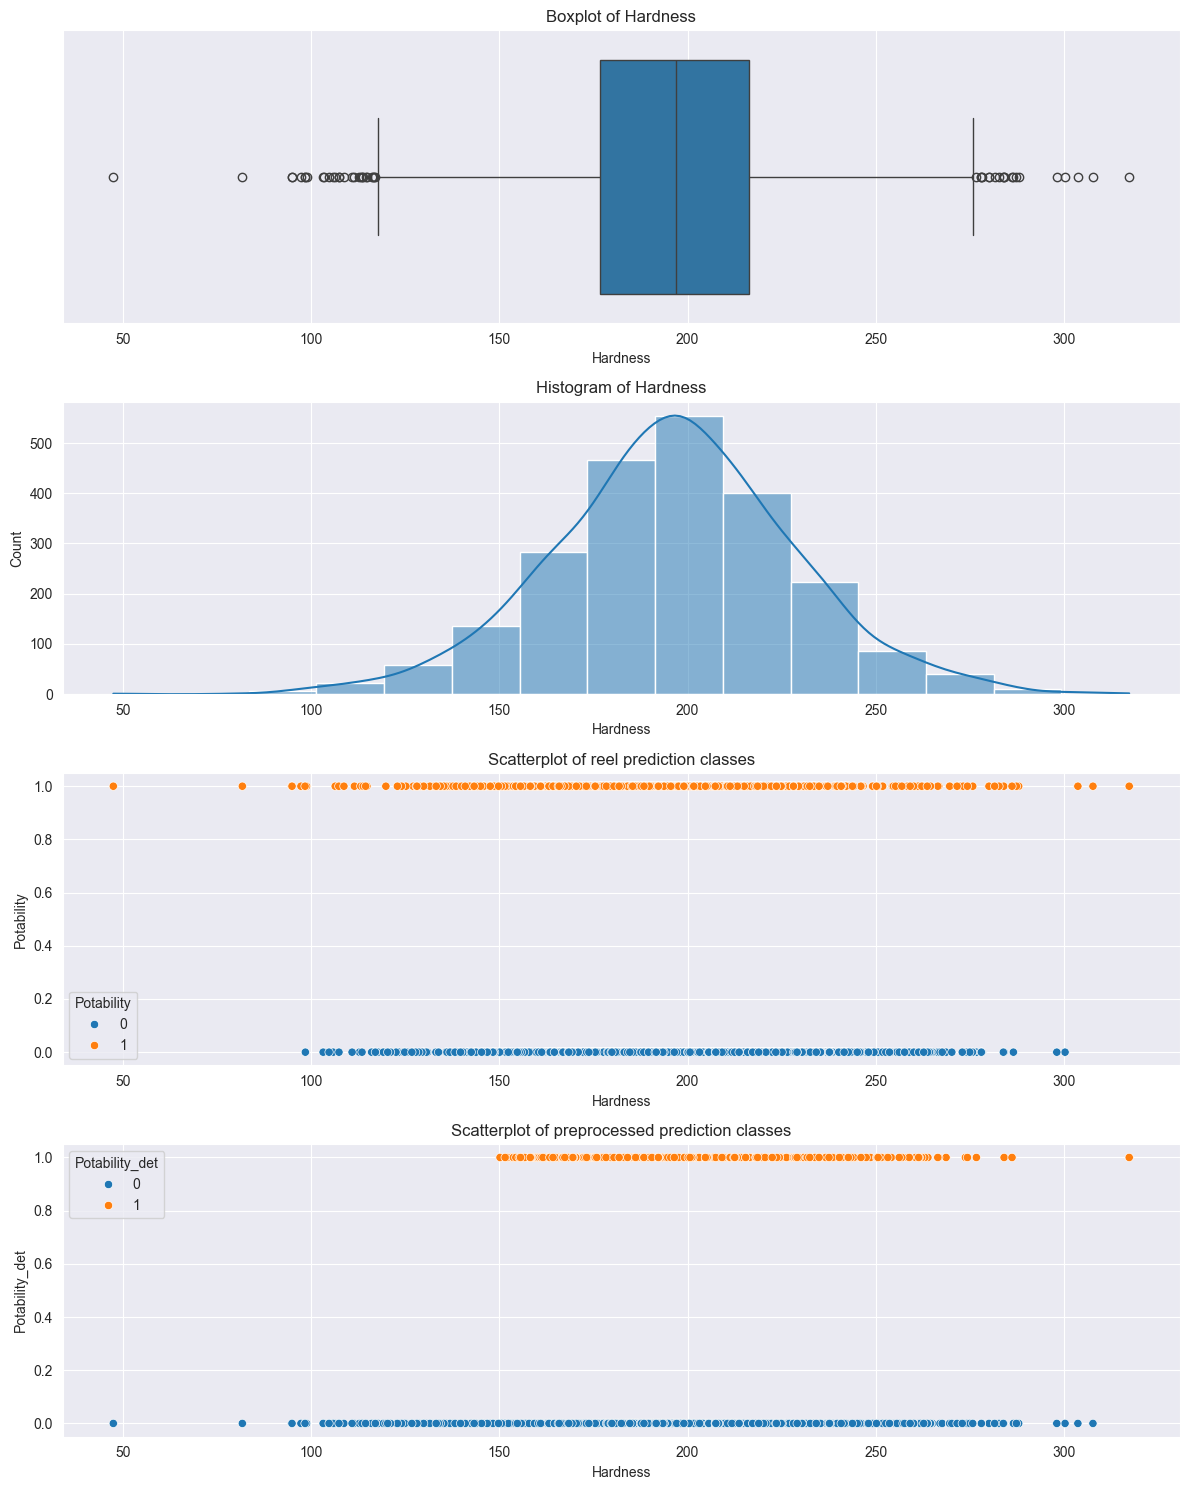

In [61]:
display_variable("Hardness")

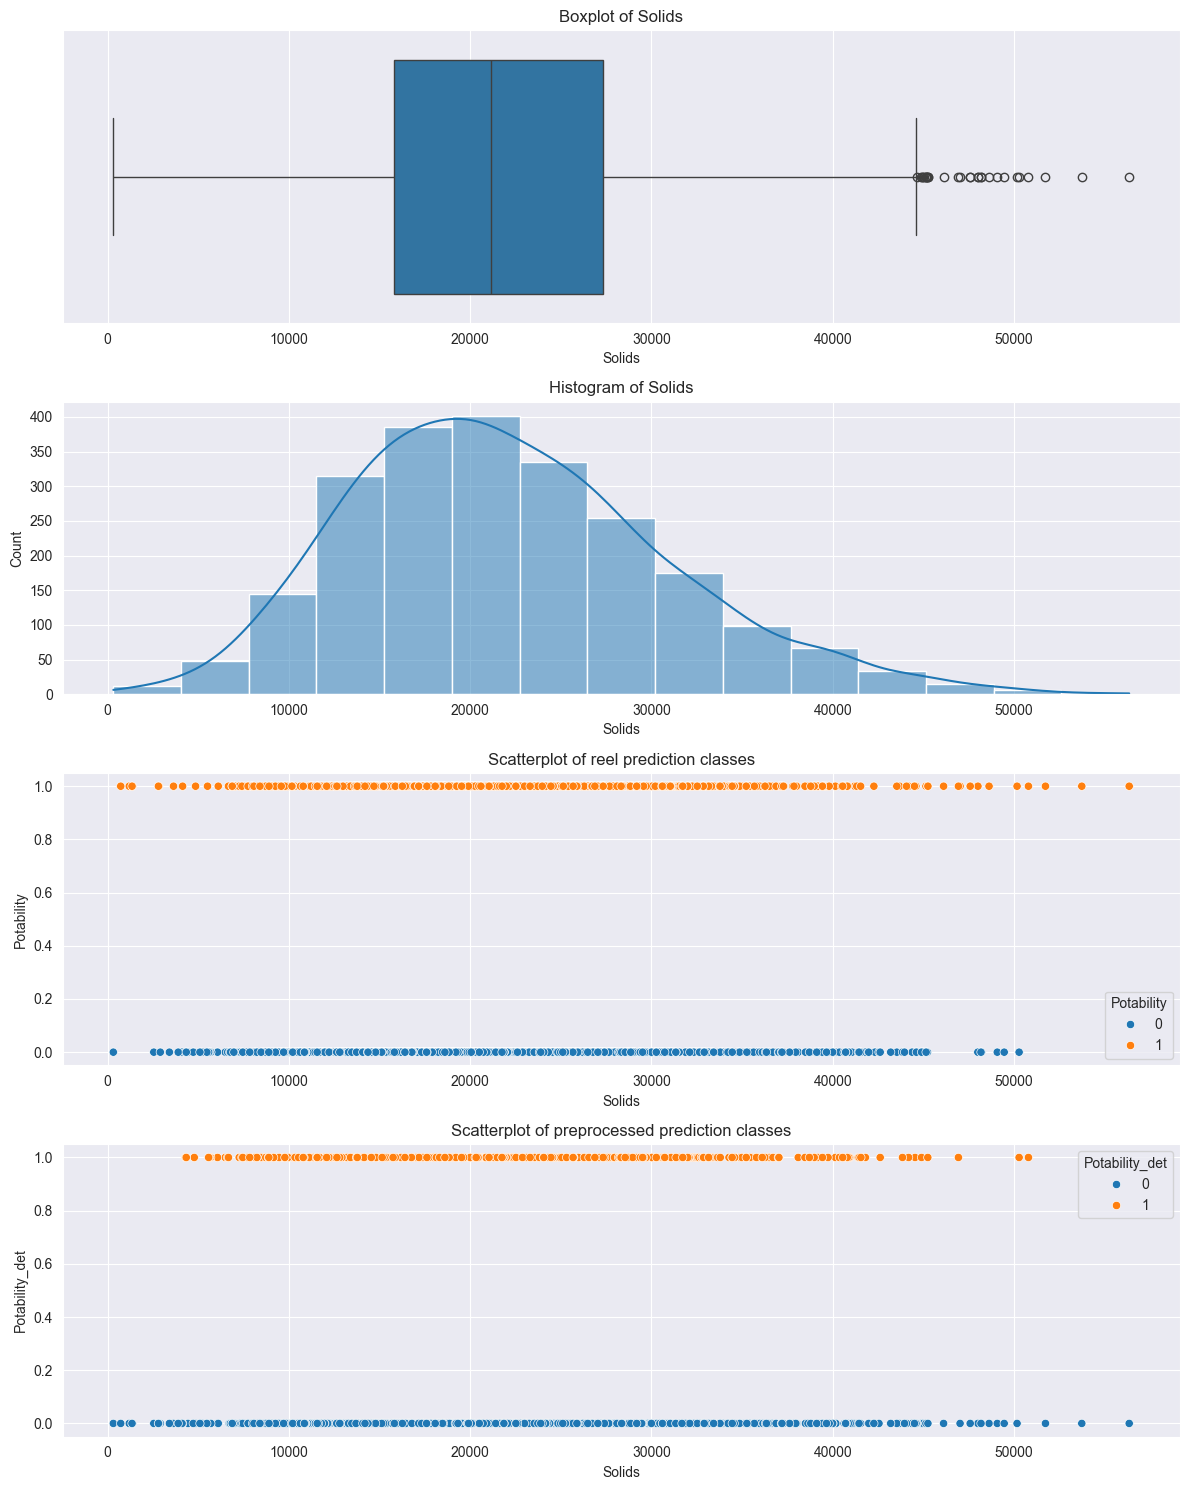

In [62]:
display_variable("Solids")

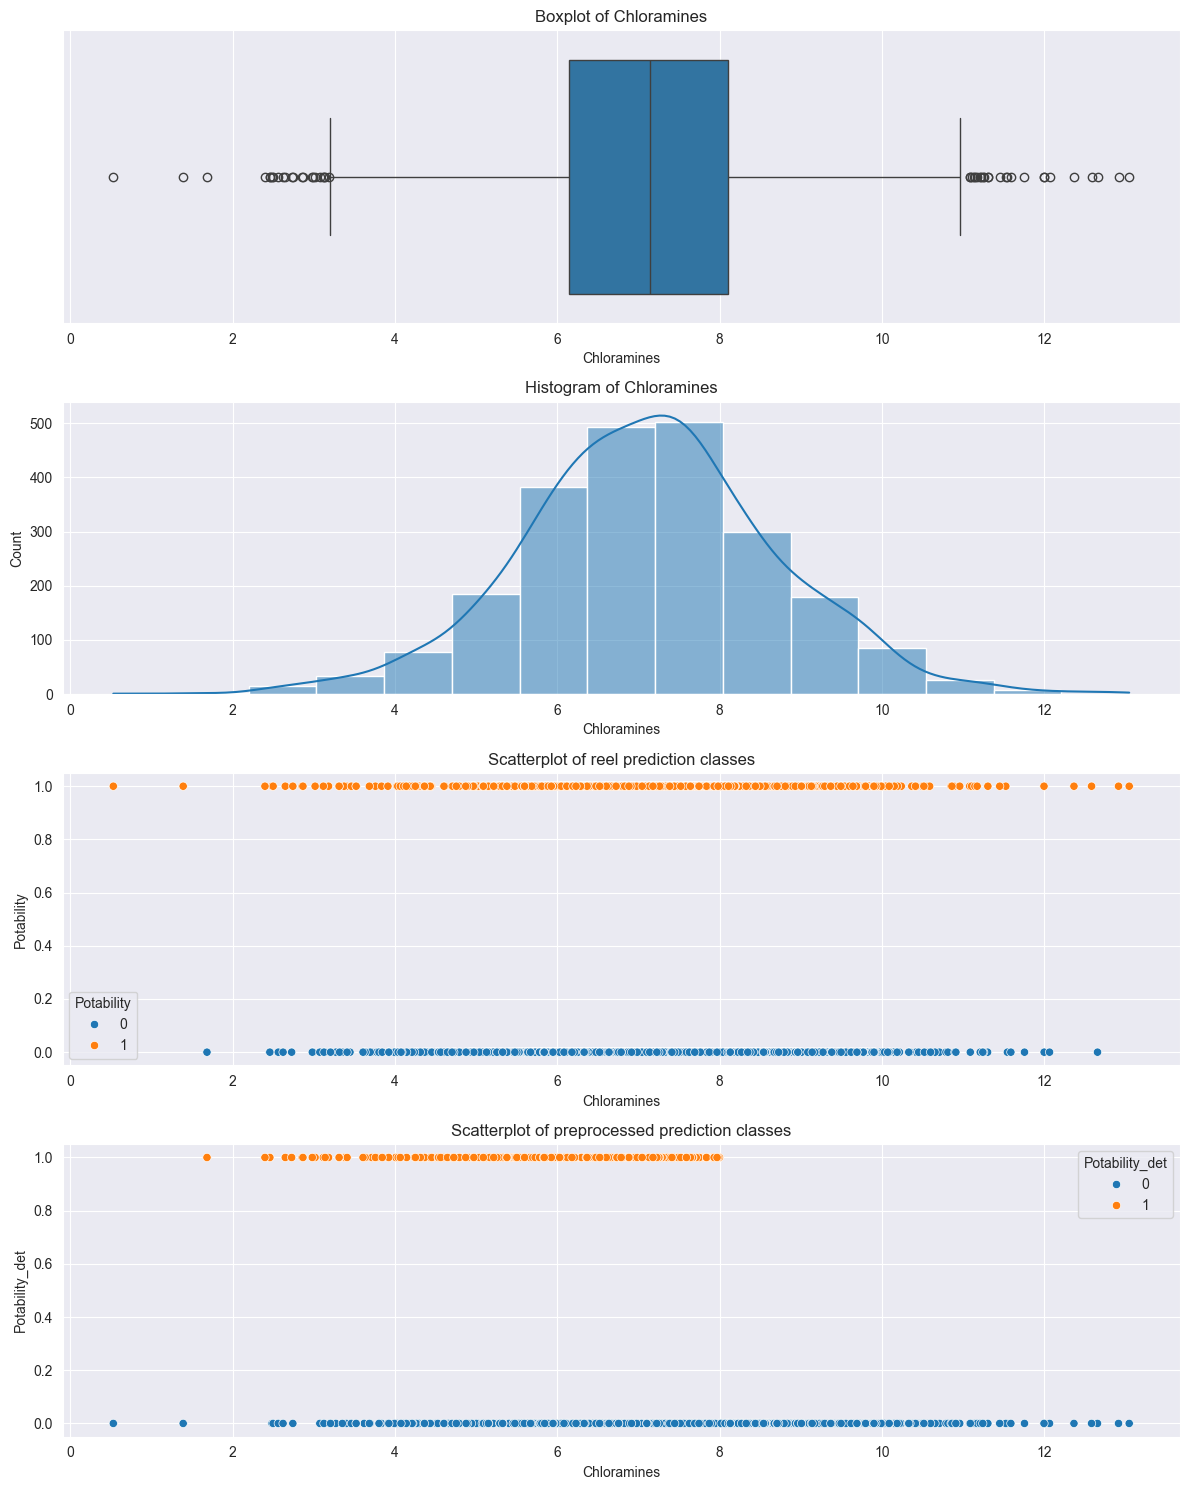

In [63]:
display_variable("Chloramines")

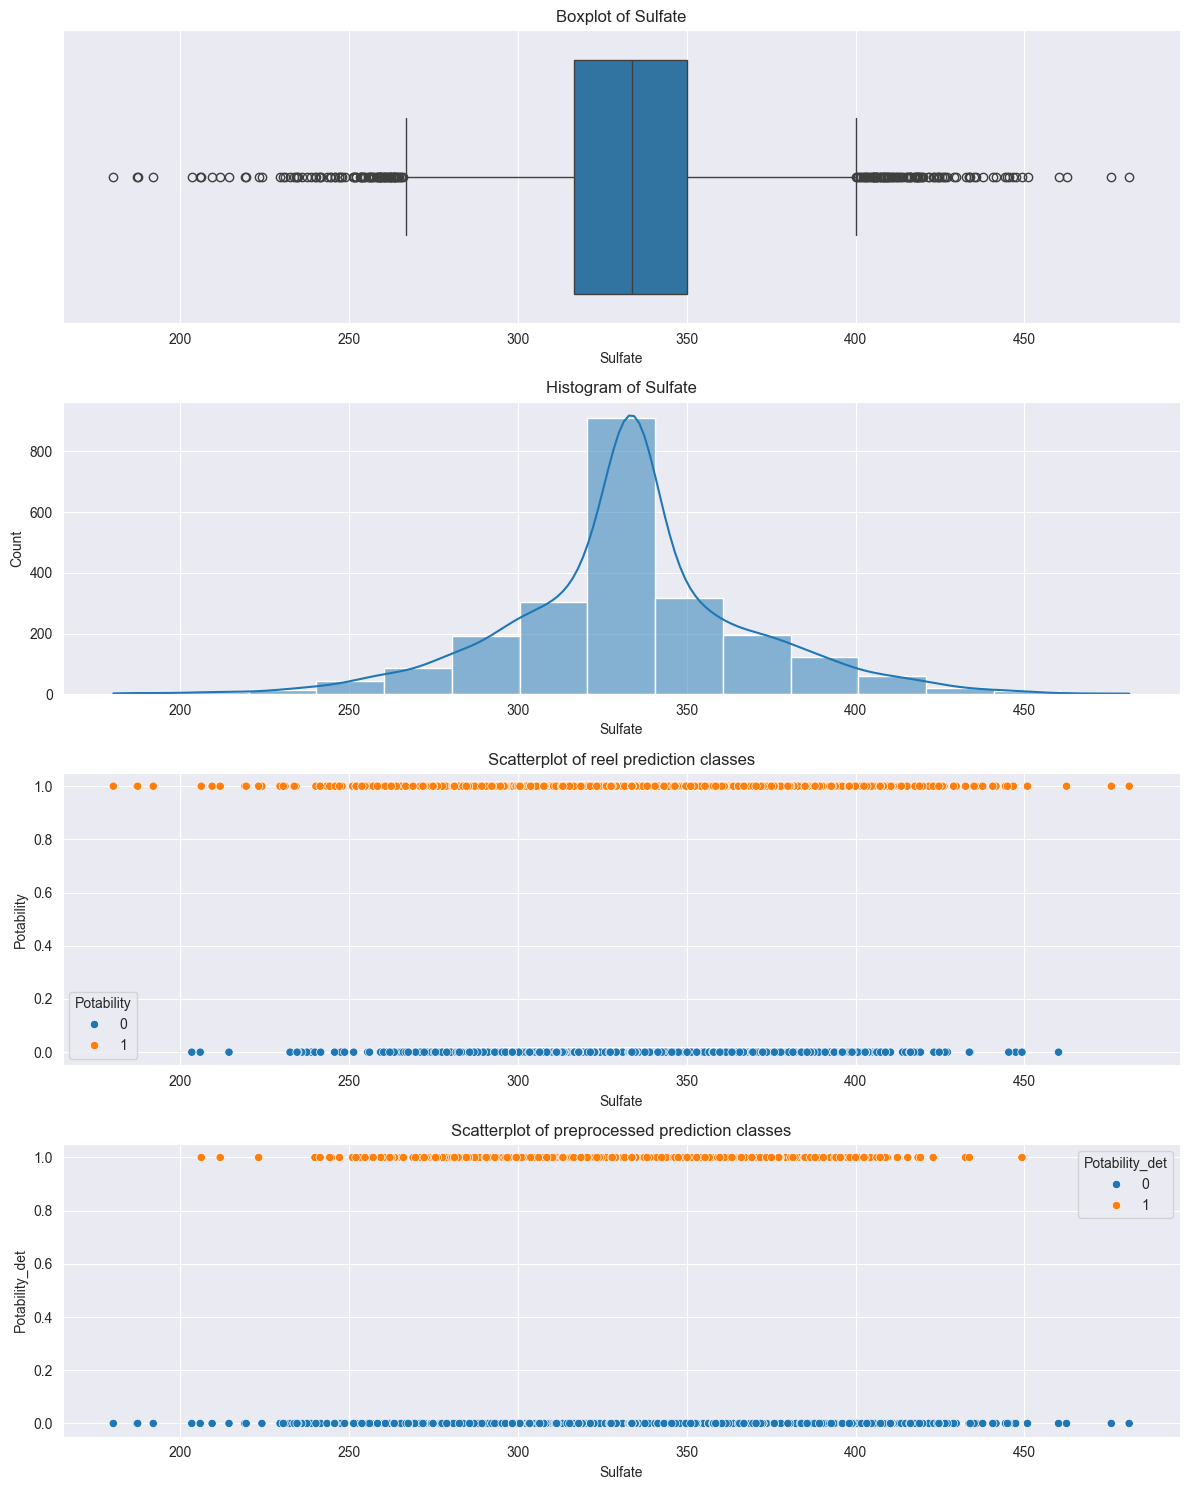

In [64]:
display_variable("Sulfate")

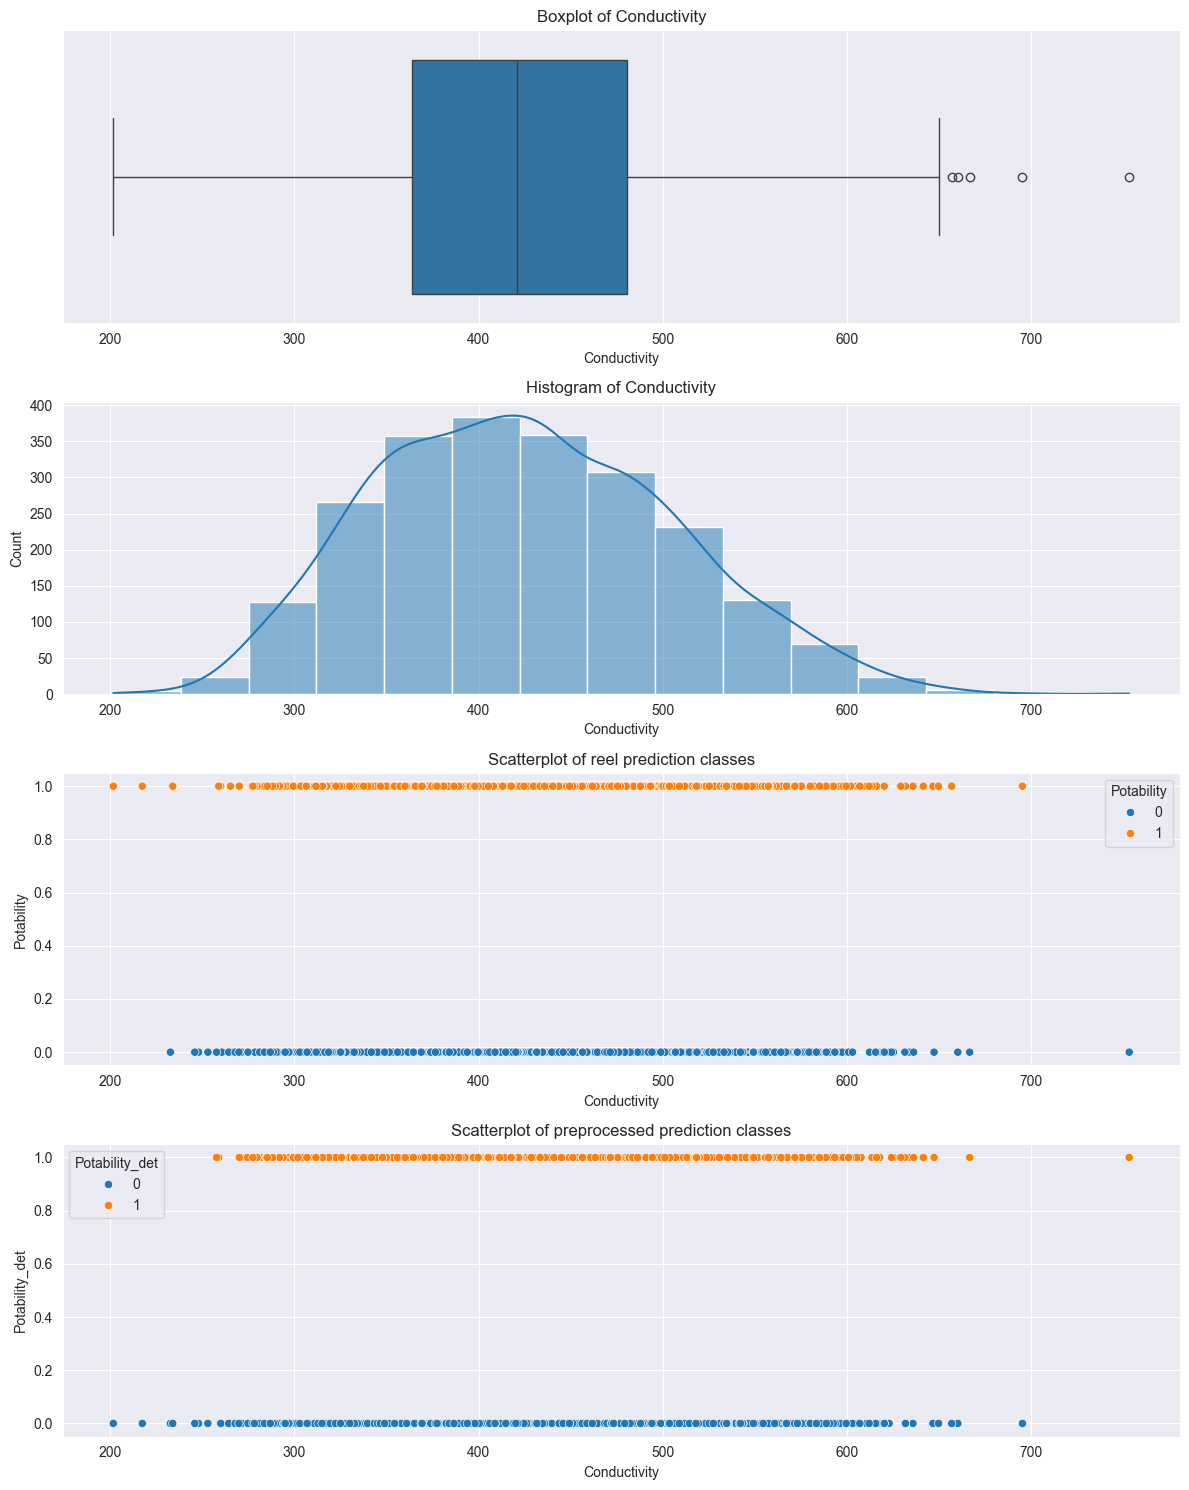

In [65]:
display_variable("Conductivity")

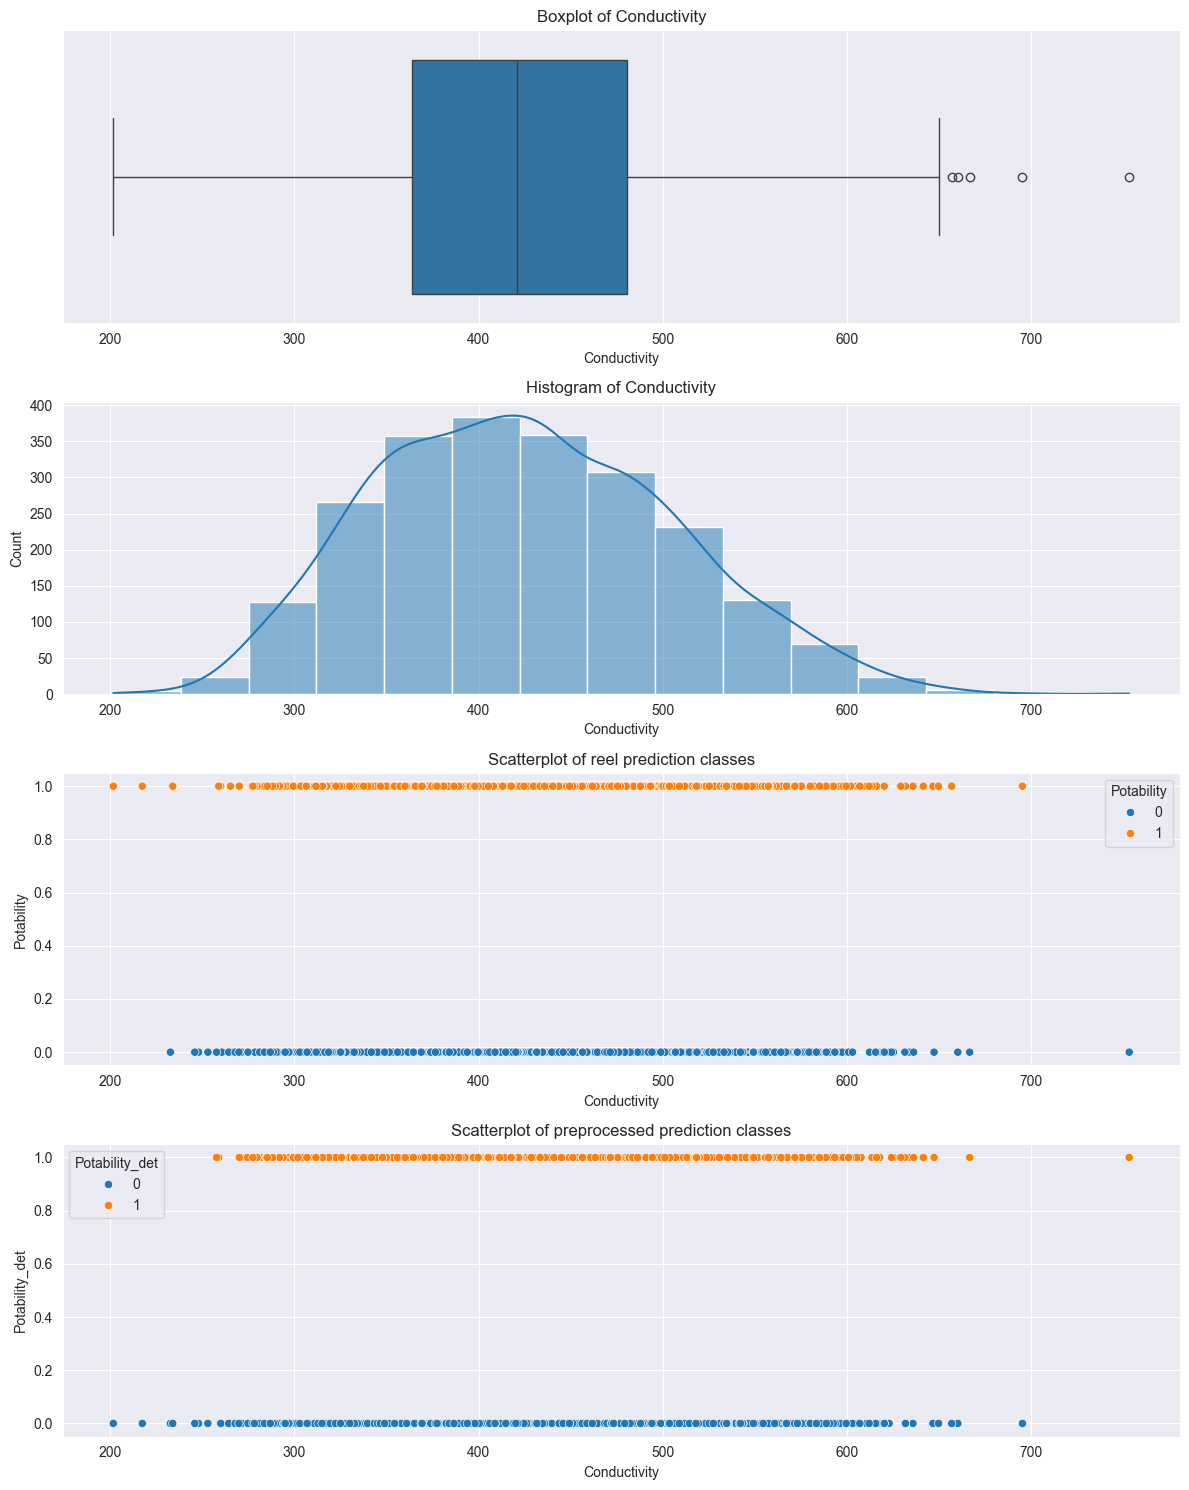

In [66]:
display_variable("Conductivity")

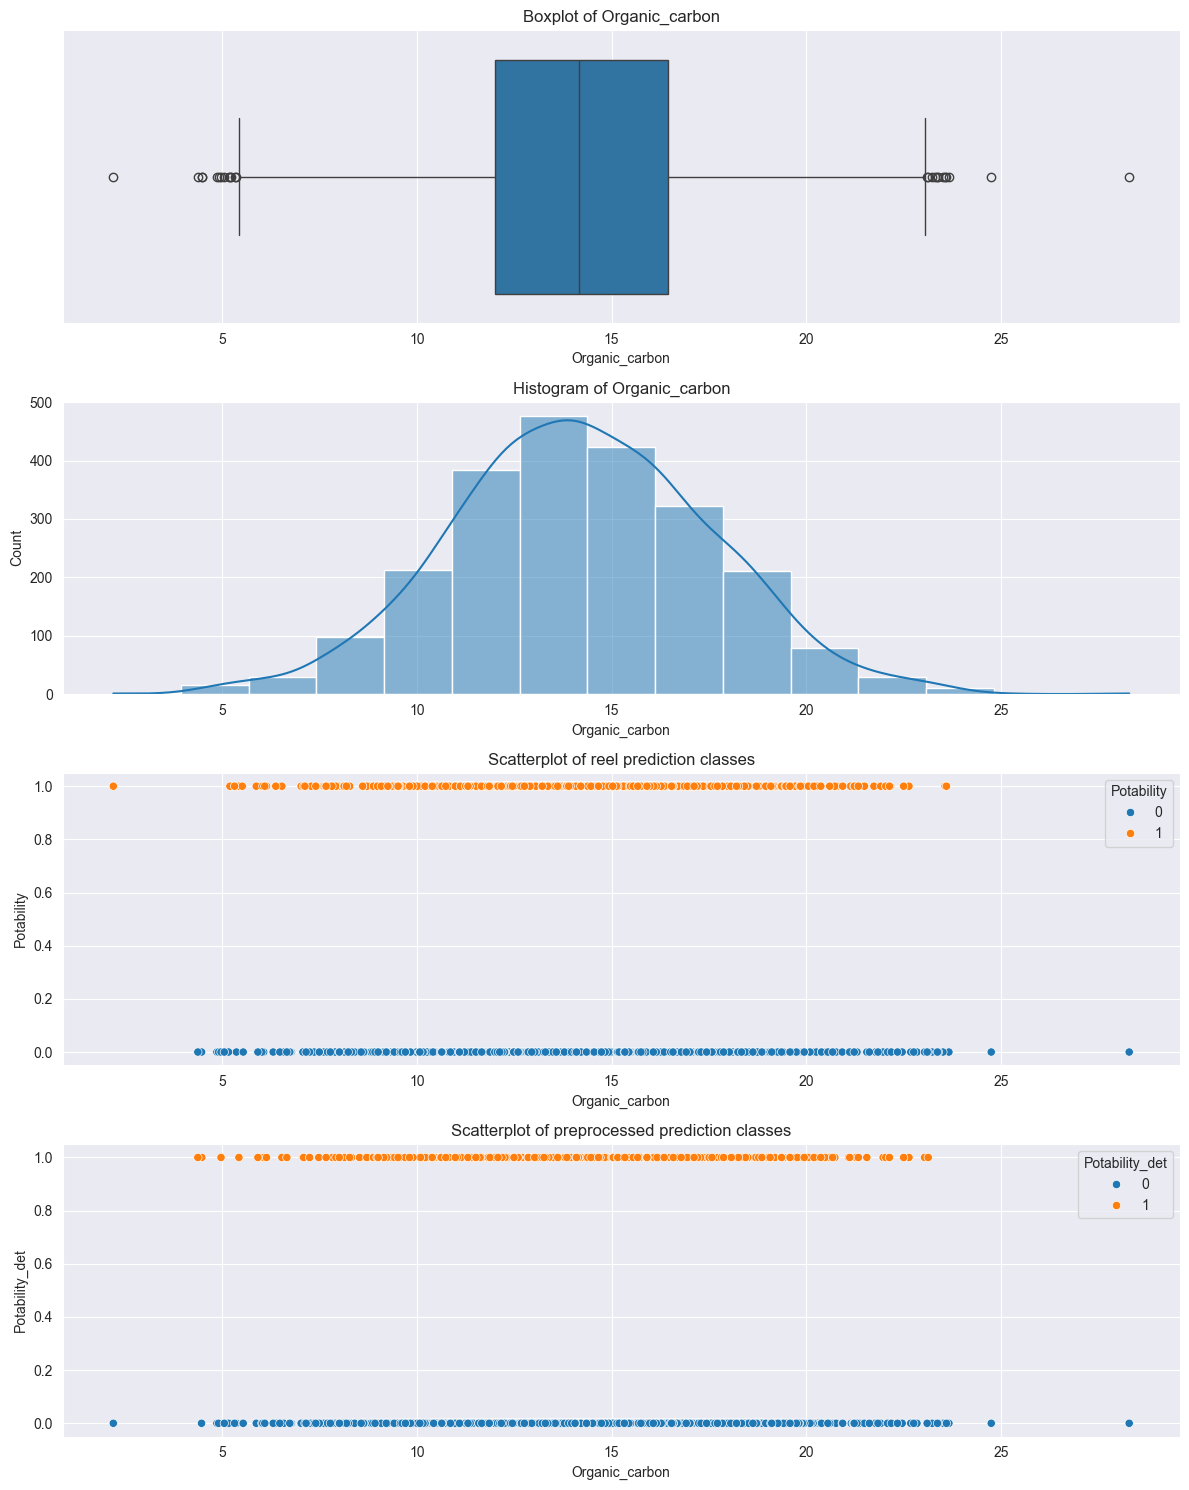

In [67]:
display_variable("Organic_carbon")

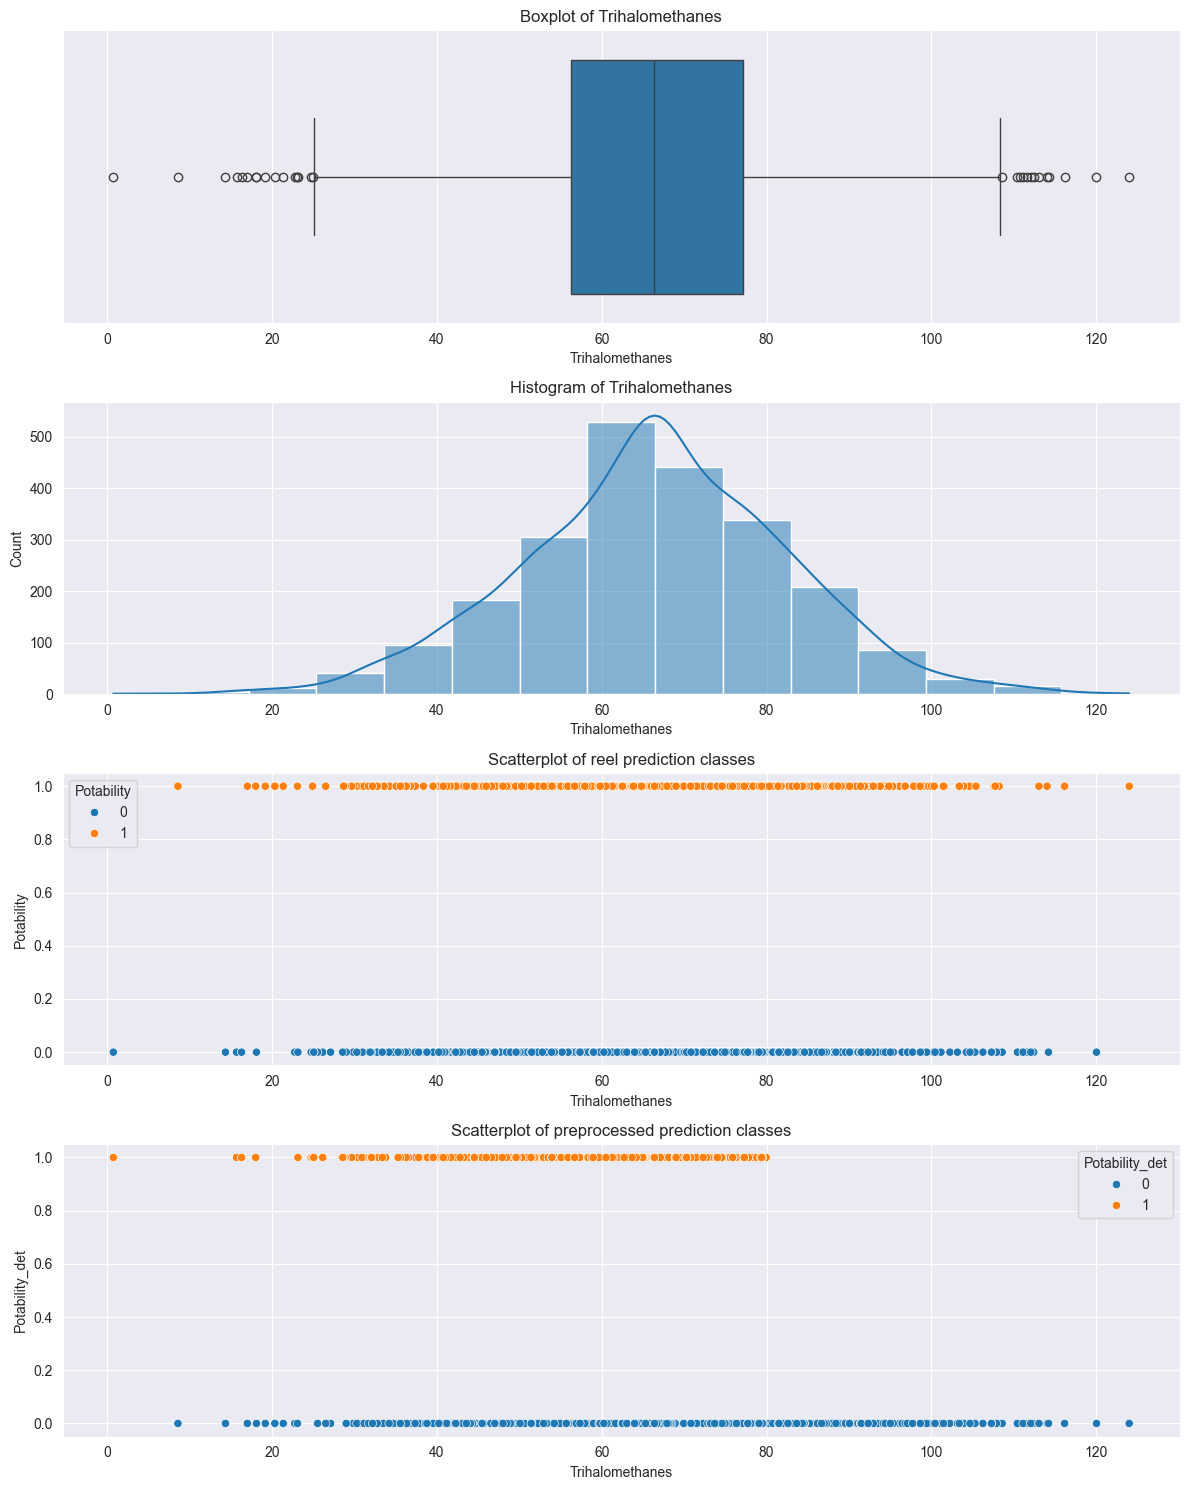

In [68]:
display_variable("Trihalomethanes")

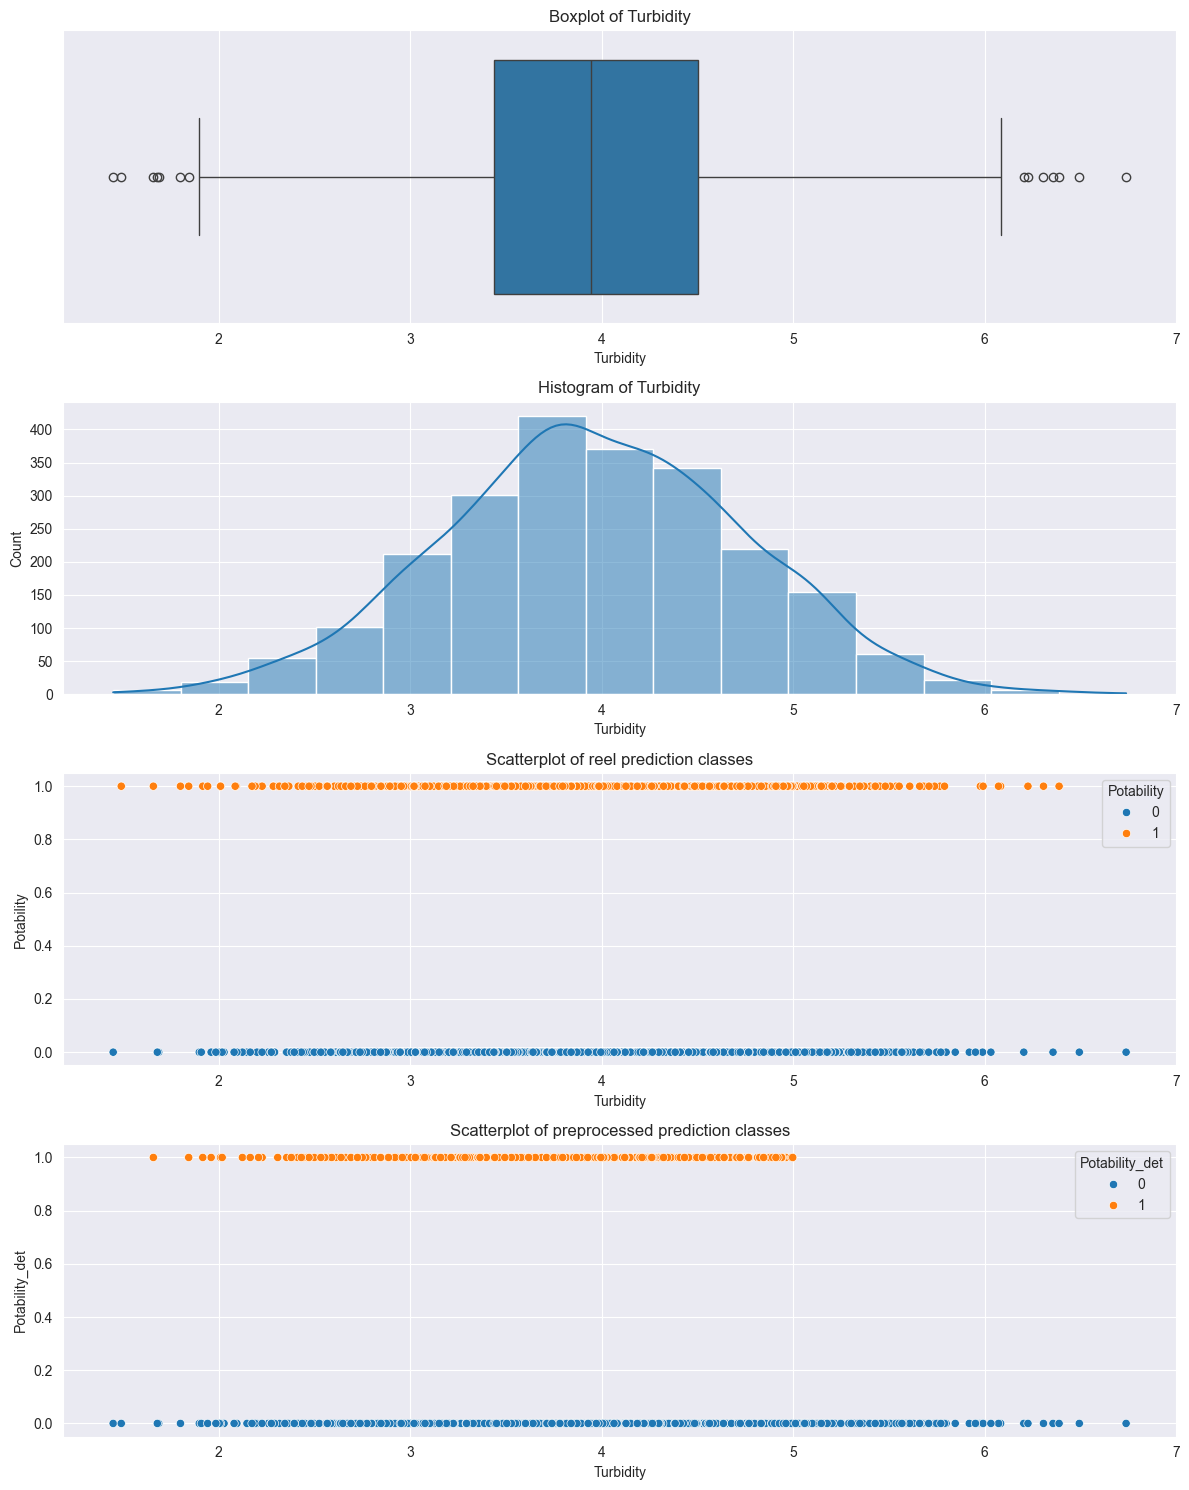

In [69]:
display_variable("Turbidity")

### 2.3) Visualisation de la répartition de la classe de prédiction

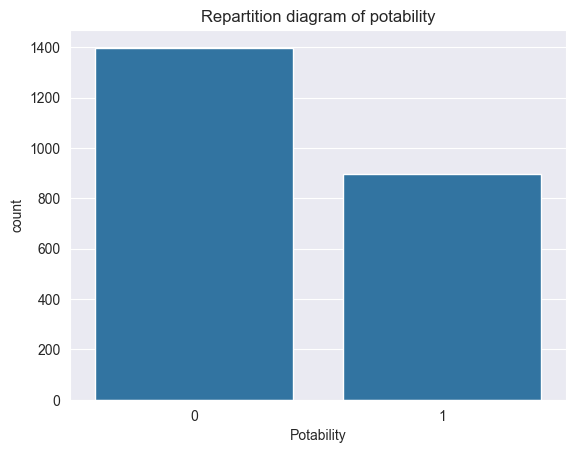

In [70]:
sns.countplot(data=df, x="Potability")
plt.title("Repartition diagram of potability")
plt.show()

## 3) Visualisation de la relation entre variable et classe de prédiction (potabilité)

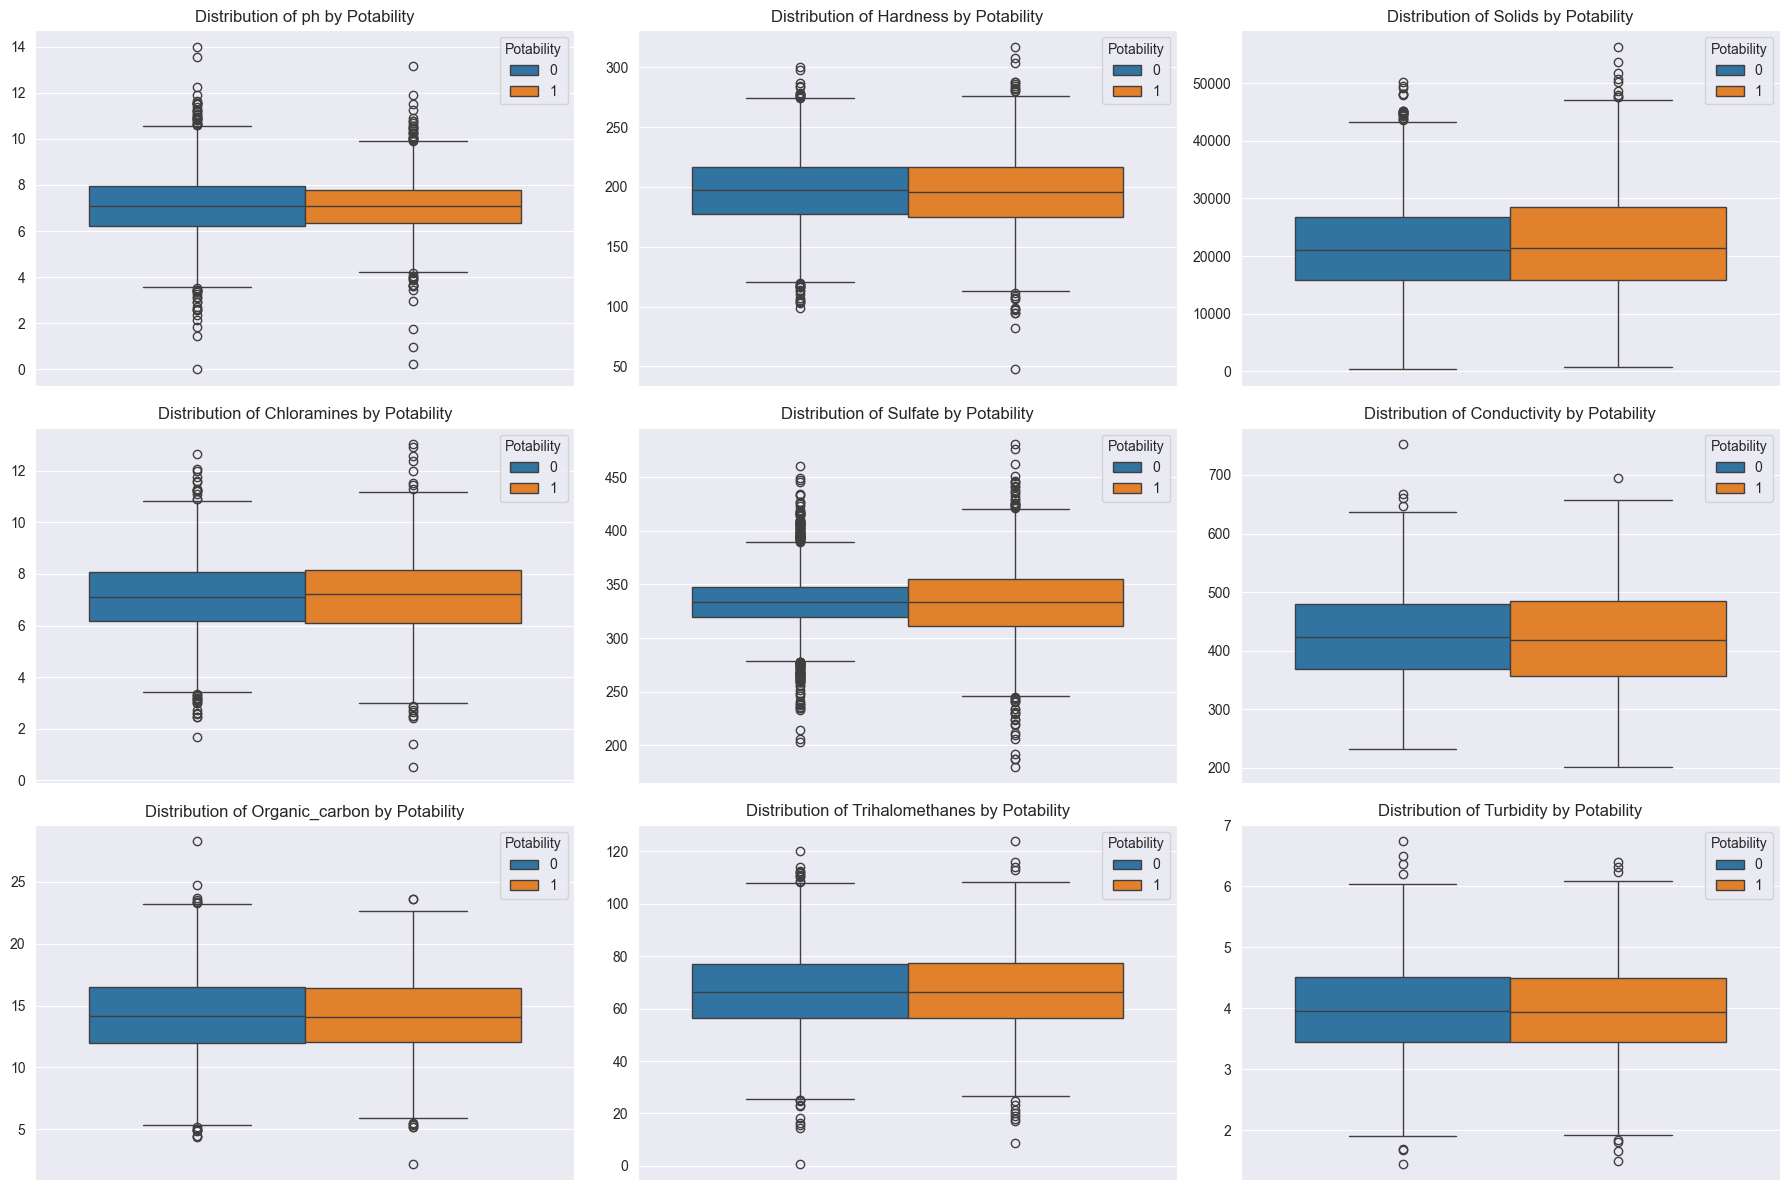

In [71]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # 3 lignes, 3 colonnes

titles = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate",
          "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]

for ax, title in zip(axes.flatten(), titles):
    sns.boxplot(y=title, data=df, hue="Potability", ax=ax)
    ax.set_title(f'Distribution of {title} by Potability')
    ax.set_xlabel('')  # Enlever le nom de la variable sur l'axe des x
    ax.set_ylabel('')  # Enlever "value" de l'axe des y
    ax.legend(title='Potability', loc='upper right')  # Ajuster la légende

plt.tight_layout()
plt.show()